# FOOD BALANCE SHEETS FOR AFRICAN COUNTRIES 

In [153]:
#importing data processing libraries
import pandas as pd
import numpy as np
#importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# datetime module
import datetime
#to ignore future warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [154]:
#load and read file
df= pd.read_excel("Food Balance Dataset.xlsx")

In [155]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4.0,Algeria,2501.0,Population,511.0,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4.0,Algeria,2501.0,Population,5301.0,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4.0,Algeria,2901.0,Grand Total,664.0,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4.0,Algeria,2901.0,Grand Total,674.0,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4.0,Algeria,2901.0,Grand Total,684.0,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [156]:
df.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
60938,181.0,Zimbabwe,2899.0,Miscellaneous,5142.0,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181.0,Zimbabwe,2899.0,Miscellaneous,645.0,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181.0,Zimbabwe,2899.0,Miscellaneous,664.0,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181.0,Zimbabwe,2899.0,Miscellaneous,674.0,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04
60942,181.0,Zimbabwe,2899.0,Miscellaneous,684.0,Fat supply quantity (g/capita/day),g/capita/day,0.04,0.05,0.03,0.02,0.01


**Exploratory Data Analysis**

In [157]:
#It gives us the no of rows and columns
df.shape

(60943, 12)

In [158]:
df.index

RangeIndex(start=0, stop=60943, step=1)

In [159]:
#check for missing values
df.isnull().any()

Area Code       False
Area            False
Item Code       False
Item            False
Element Code    False
Element         False
Unit            False
Y2014            True
Y2015            True
Y2016            True
Y2017            True
Y2018            True
dtype: bool

In [160]:
df.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [161]:
#use groupby to count the sum of each unique value in the Y2014 column
df.groupby('Item')['Y2014'].sum()

Item
Alcohol, Non-Food        2403.00
Alcoholic Beverages    102410.11
Animal Products         11935.65
Animal fats            209460.54
Apples and products      9499.23
                         ...    
Vegetables, Other      155038.96
Vegetal Products       107145.19
Wheat and products     232670.13
Wine                     4497.36
Yams                   200396.96
Name: Y2014, Length: 119, dtype: float64

In [162]:
df.groupby('Element')['Y2018'].sum()

Element
Domestic supply quantity                  2161192.10
Export Quantity                            181594.80
Fat supply quantity (g/capita/day)          10258.69
Feed                                       233489.68
Food                                      1303841.28
Food supply (kcal/capita/day)              455261.00
Food supply quantity (kg/capita/yr)         49056.85
Import Quantity                            287997.09
Losses                                     163902.00
Other uses (non-food)                       91300.97
Processing                                 308429.00
Production                                2075072.89
Protein supply quantity (g/capita/day)      11833.56
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Total Population - Both sexes             1140605.00
Tourist consumption                            90.00
Name: Y2018, dtype: float64

In [163]:
df.groupby('Area')('Element')['Y2018'].sum()

TypeError: 'DataFrameGroupBy' object is not callable

In [149]:
#use groupby to count the sum of each unique value in the Y2014 column
df.groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993.0,14197445.0,28068795.0,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910.0,11840553.0,26026133.0,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050.0,13535000.0,3435732.0,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272.0,3538507.0,7282199.0,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295.0,13285035.0,25406622.0,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057.0,13511060.0,3329296.0,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446.0,13185401.0,3163725.0,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174.0,13795966.0,28834929.0,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353.0,5424803.0,10292107.0,153223.00,155439.00,157787.00,160614.00,163902.00


In [125]:
df.groupby('Item')['Y2017'].sum()

Item
Alcohol, Non-Food        2348.00
Alcoholic Beverages     95581.06
Animal Products         11547.65
Animal fats            269617.53
Apples and products     10198.90
                         ...    
Vegetables, Other      157752.59
Vegetal Products       107655.20
Wheat and products     240047.62
Wine                     4178.02
Yams                   229174.59
Name: Y2017, Length: 119, dtype: float64

In [126]:
df.groupby('Item')['Y2017'].value_counts() 

Item               Y2017  
Alcohol, Non-Food  0.0        153
                   1.0         19
                   3.0         14
                   5.0         10
                   8.0          6
                             ... 
Yams               7857.0       1
                   17476.0      1
                   23000.0      1
                   49083.0      1
                   54083.0      1
Name: Y2017, Length: 17713, dtype: int64

In [127]:
df.groupby('Item')['Y2017'].count() 

Item
Alcohol, Non-Food      273
Alcoholic Beverages    560
Animal Products        135
Animal fats            636
Apples and products    511
                      ... 
Vegetables, Other      574
Vegetal Products       135
Wheat and products     646
Wine                   491
Yams                   349
Name: Y2017, Length: 119, dtype: int64

In [128]:
df.dtypes

Area Code       float64
Area             object
Item Code       float64
Item             object
Element Code    float64
Element          object
Unit             object
Y2014           float64
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
dtype: object

In [129]:
df.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')

In [130]:
for i, col in enumerate(df.columns):
    print((i+1), '-',col)

1 - Area Code
2 - Area
3 - Item Code
4 - Item
5 - Element Code
6 - Element
7 - Unit
8 - Y2014
9 - Y2015
10 - Y2016
11 - Y2017
12 - Y2018


In [131]:
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  float64
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  float64
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  float64
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.6+ MB


In [133]:
#check for duplicate rows
df.duplicated().any()

False

In [134]:
df['Item'].unique()

array(['Population', 'Grand Total', 'Vegetal Products', 'Animal Products',
       'Cereals - Excluding Beer', 'Wheat and products',
       'Rice and products', 'Barley and products', 'Maize and products',
       'Rye and products', 'Oats', 'Millet and products',
       'Sorghum and products', 'Cereals, Other', 'Starchy Roots',
       'Cassava and products', 'Potatoes and products', 'Sweet potatoes',
       'Yams', 'Roots, Other', 'Sugar Crops', 'Sugar cane', 'Sugar beet',
       'Sugar & Sweeteners', 'Sugar (Raw Equivalent)',
       'Sweeteners, Other', 'Honey', 'Pulses', 'Beans', 'Peas',
       'Pulses, Other and products', 'Treenuts', 'Nuts and products',
       'Oilcrops', 'Soyabeans', 'Groundnuts (Shelled Eq)',
       'Sunflower seed', 'Rape and Mustardseed', 'Cottonseed',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Oilcrops, Other',
       'Vegetable Oils', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil

In [135]:
number=len(df['Element'].unique())
number

18

In [136]:
number=len(df['Item'].unique())
number

119

In [164]:
number=len(df['Area'].unique())
number

49

 **Data Visualization**

Text(0.5, 0, 'Item Unit')

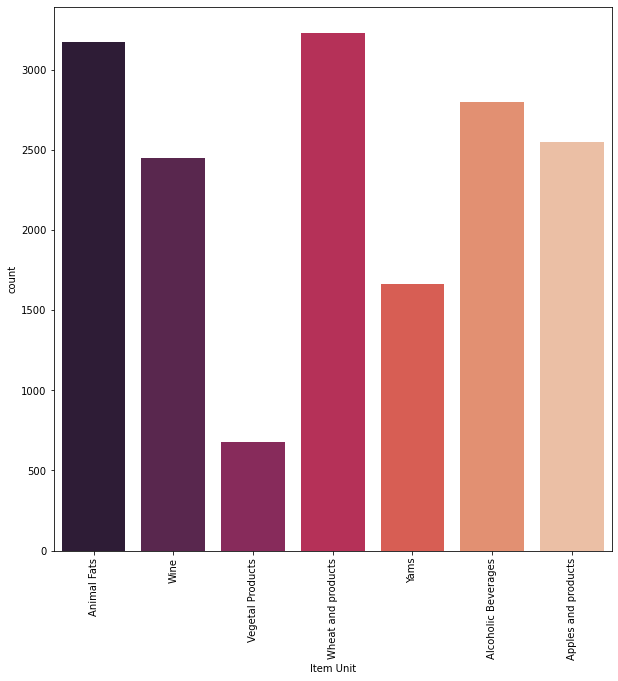

In [137]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

item_unit = pd.DataFrame({'Item':['Animal Fats', 'Wine', 'Vegetal Products', 'Wheat and products', 'Yams', 'Alcoholic Beverages',
'Apples and products'],
'count':[3173, 2452, 675, 3231, 1666, 2801, 2552]})

sns.barplot(data=item_unit, x='Item', y='count', palette="rocket")
plt.xlabel('Item Unit')

In [138]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4.0,Algeria,2501.0,Population,511.0,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4.0,Algeria,2501.0,Population,5301.0,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4.0,Algeria,2901.0,Grand Total,664.0,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4.0,Algeria,2901.0,Grand Total,674.0,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4.0,Algeria,2901.0,Grand Total,684.0,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


<AxesSubplot:xlabel='Item Code', ylabel='Area Code'>

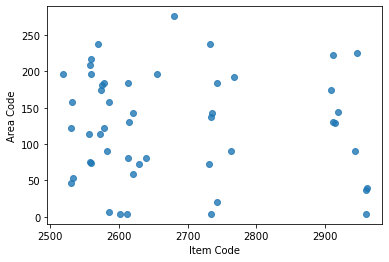

In [139]:
sample_df = df.sample(n=50, random_state=4)
sns.regplot(x=sample_df["Item Code"], y=sample_df["Area Code"],
fit_reg=False)

Text(0.5, 0, 'Item Code')

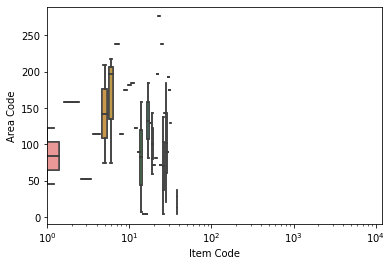

In [140]:
#box plotting
sns.boxplot(x="Item Code", y="Area Code",
palette=["m", "g"], data=sample_df)

#Because of the extreme range of the values for the item code, we can plot the box by taking the logarithm of the x-axis as follows:
g = sns.boxplot(data=sample_df, x='Item Code', y='Area Code')
g.set_xscale("log")
g.set_xlim(1, 12000)
plt.xlabel('Item Code')

In [141]:
df.corr()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


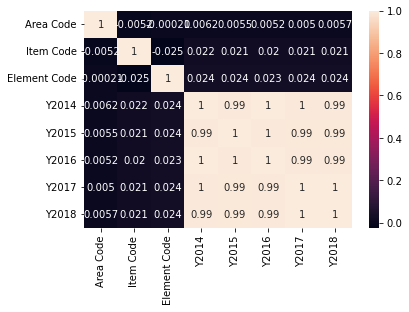

In [142]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Element Code', ylabel='Density'>

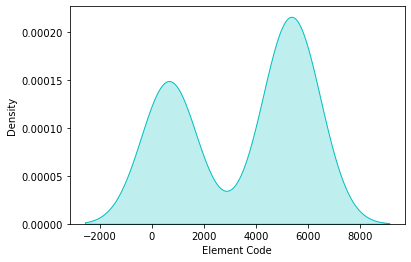

In [147]:
# KDE plot
sns.kdeplot(sample_df['Element Code'], shade=True, color="c")